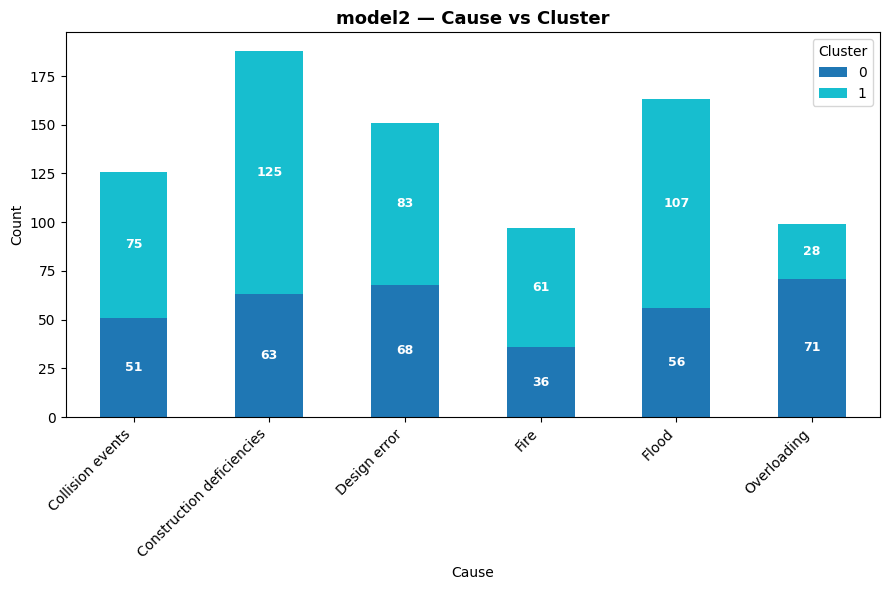

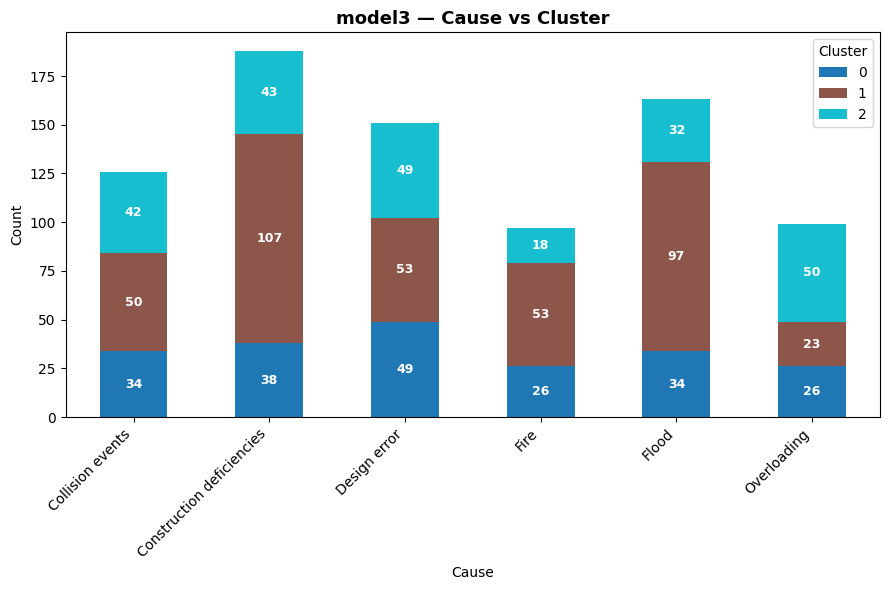

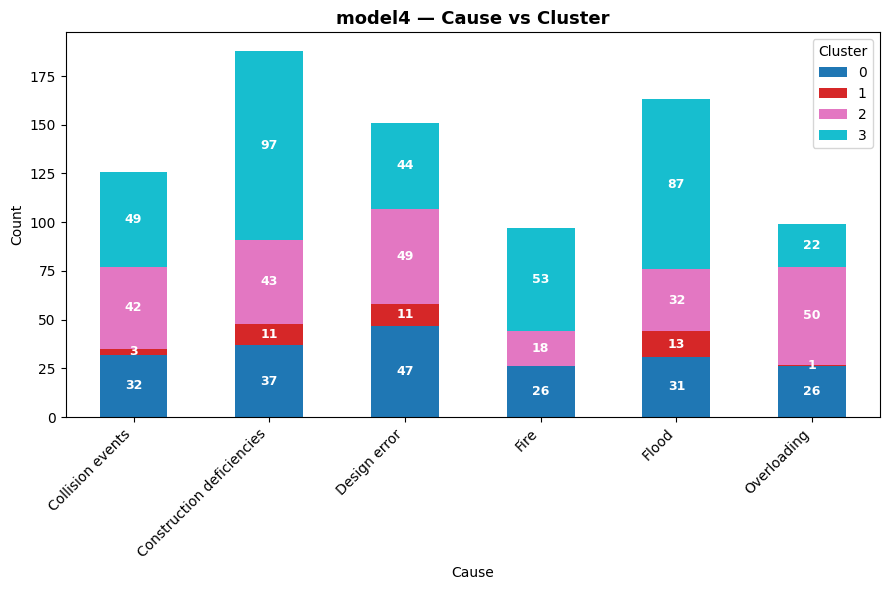

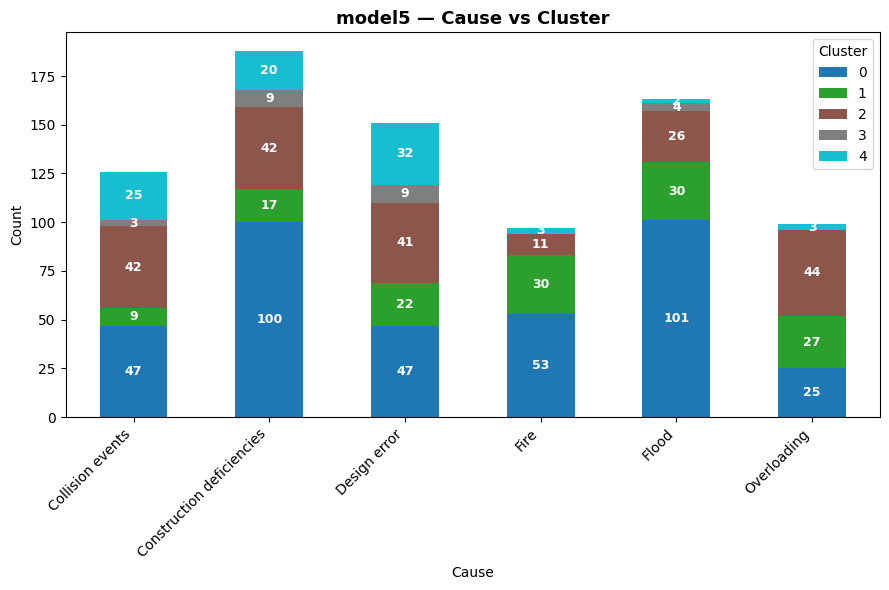

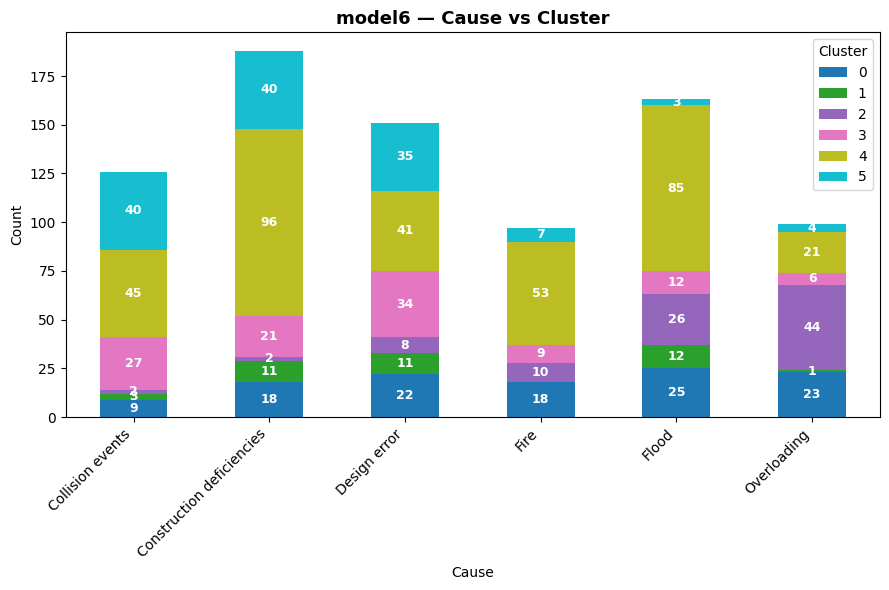

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

files = ["model2.csv", "model3.csv", "model4.csv","model5.csv","model6.csv"]


dfs = {f"model{i+2}": pd.read_csv(file) for i, file in enumerate(files)}

for name, df in dfs.items():
    plt.figure(figsize=(9,6))
    
    # group by Cause and cluster
    grouped = df.groupby(['Cause', 'cluster']).size().unstack(fill_value=0)
    
    # plot as stacked bar chart
    ax = grouped.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='tab10')
    
    # add count labels
    for i, cause in enumerate(grouped.index):
        y_offset = 0
        for cluster in grouped.columns:
            value = grouped.loc[cause, cluster]
            if value > 0:
                ax.text(    
                    x=i,
                    y=y_offset + value / 2,
                    s=str(value),
                    ha='center',
                    va='center',
                    fontsize=9,
                    color='white',
                    fontweight='bold'
                )
                y_offset += value
    
    plt.title(f"{name} — Cause vs Cluster", fontsize=13, fontweight='bold')
    plt.xlabel("Cause")
    plt.ylabel("Count")
    plt.legend(title="Cluster")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
